In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout ,Flatten ,Conv2D,MaxPool2D,Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
sns.set(style='white', context='notebook',palette='deep')

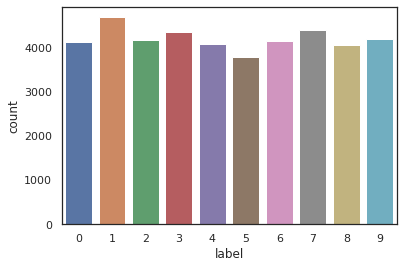

In [4]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
y_train=train['label']
x_train=train.drop(labels=['label'],axis=1)
del train
g=sns.countplot(y_train)

In [5]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
x_train=x_train/255.0
test=test/255.0

In [8]:
x_train=x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [9]:
y_train=to_categorical(y_train,num_classes=10)


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=2)

In [11]:
alex=Sequential()
alex.add(Conv2D(filters=32,kernel_size=(11,11),padding='Same',activation='relu',input_shape=(28,28,1)))
alex.add(BatchNormalization())
alex.add(Activation('relu'))
alex.add(MaxPool2D(pool_size=(2,2),padding='Same'))

alex.add(Conv2D(filters=48,kernel_size=(11,11),padding='Same',activation='relu'))
alex.add(BatchNormalization())
alex.add(Activation('relu'))
alex.add(MaxPool2D(pool_size=(2,2),padding='Same'))

alex.add(Conv2D(filters=64,kernel_size=(11,11),padding='Same',activation='relu'))
alex.add(BatchNormalization())
alex.add(Activation('relu'))

alex.add(Conv2D(filters=64,kernel_size=(11,11),padding='Same',activation='relu'))
alex.add(BatchNormalization())
alex.add(Activation('relu'))

alex.add(Conv2D(filters=48,kernel_size=(11,11),padding='Same',activation='relu'))
alex.add(BatchNormalization())
alex.add(Activation('relu'))
alex.add(MaxPool2D(pool_size=(2,2),padding='Same'))

alex.add(Flatten())
alex.add(Dense(128))
alex.add(BatchNormalization())
alex.add(Activation('relu'))
alex.add(Dropout(0.4))

alex.add(Dense(128))
alex.add(BatchNormalization())
alex.add(Activation('relu'))
alex.add(Dropout(0.4))

alex.add(Dense(128))
alex.add(BatchNormalization())
alex.add(Activation('relu'))
alex.add(Dropout(0.4))

alex.add(Dense(10,activation='softmax'))

In [12]:
optimizer=RMSprop(lr=0.01,rho=0.9,epsilon=1e-08,decay=0.0005)
alex.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.4,min_lr=0.00001)

In [14]:
epochs=1
batch_size=86

In [15]:
predictor=alex.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),verbose=2)

440/440 - 396s - loss: 0.5967 - accuracy: 0.8032 - val_loss: 0.8931 - val_accuracy: 0.9055


In [16]:
y_pred=alex.predict(test)
print(y_pred[0])

[1.9498088e-17 6.4865576e-15 1.0000000e+00 1.0102673e-13 3.9810551e-21
 3.2941796e-24 3.2390377e-18 5.5166351e-14 6.5337013e-20 3.1350037e-25]


In [17]:
y_true=np.argmax(y_pred,axis=1)
result=pd.Series(y_true,name='Label')
print(result)

0        2
1        0
2        7
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    7
27999    2
Name: Label, Length: 28000, dtype: int64


In [18]:
sub=pd.concat([pd.Series(range(1,28001),name='ImageId'),result],axis=1)
sub.to_csv('output.csv')
print(sub
     )

       ImageId  Label
0            1      2
1            2      0
2            3      7
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      7
27999    28000      2

[28000 rows x 2 columns]
